
In \[384\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

In \[385\]:

    #Read data from csv file
    data = pd.read_csv('data.csv')
    data.head()

Out\[385\]:

|     | quarter | electricity_consumption |
|-----|---------|-------------------------|
| 0   | 1387-Q1 | 12574                   |
| 1   | 1387-Q2 | 13338                   |
| 2   | 1387-Q3 | 12821                   |
| 3   | 1387-Q4 | 14511                   |
| 4   | 1388-Q1 | 13392                   |





Document data set description (meta data)

In \[386\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 54 entries, 0 to 53
    Data columns (total 2 columns):
     #   Column                   Non-Null Count  Dtype
    ---  ------                   --------------  -----
     0   quarter                  54 non-null     object
     1   electricity_consumption  54 non-null     int64
    dtypes: int64(1), object(1)
    memory usage: 992.0+ bytes

Check for missing values

In \[387\]:

    np.sum(data.isnull())

Out\[387\]:

    quarter                    0
    electricity_consumption    0
    dtype: int64

Univariate data analysis

In \[388\]:

    #Extract year and quarter from date
    data['year'] = data['quarter'].apply(lambda s: s.split('-')[0]).astype(int)
    data['Q'] = data['quarter'].apply(lambda s: s.split('-')[1])
    data.head()

Out\[388\]:

|     | quarter | electricity_consumption | year | Q   |
|-----|---------|-------------------------|------|-----|
| 0   | 1387-Q1 | 12574                   | 1387 | Q1  |
| 1   | 1387-Q2 | 13338                   | 1387 | Q2  |
| 2   | 1387-Q3 | 12821                   | 1387 | Q3  |
| 3   | 1387-Q4 | 14511                   | 1387 | Q4  |
| 4   | 1388-Q1 | 13392                   | 1388 | Q1  |





In \[389\]:

    # Adjust the number of ticks to match the range of labels
    num_labels = 14  # Assuming you have 13 labels for years 1387 to 1399
    ticks = np.linspace(0, data.shape[0] - 1, num_labels, dtype=int)
    labels = range(1387, 1387 + num_labels)

In \[390\]:

    # Line chart
    plt.figure(figsize=(16, 5))
    plt.plot(data['quarter'], data['electricity_consumption'],
             color='grey', alpha=0.8, marker='o', linestyle='-')
    plt.title('Iran Quarterly Electricity Consumption')
    plt.xlabel('Year')
    plt.ylabel('Units')

    plt.xticks(ticks=ticks, labels=labels, rotation=90)
    plt.grid()
    plt.show()

![](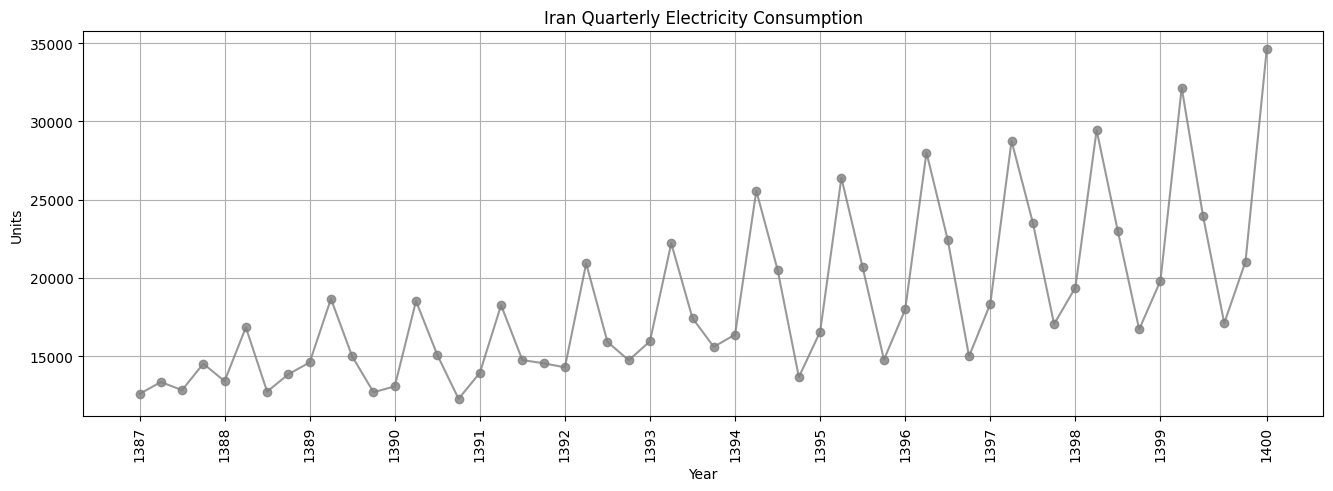%0A)

In \[391\]:

    #Time series decomposition
    from statsmodels.tsa.seasonal import seasonal_decompose

    #Additive decomposition
    add_decompose = seasonal_decompose(data['electricity_consumption'],
                                       model = 'multiplicative', #additive vs. multiplicative
                                       period = 4, #Period of the series
                                       two_sided = True) #centered moving average is computed

    #Plot the results
    add_decompose.plot()
    plt.show()

![](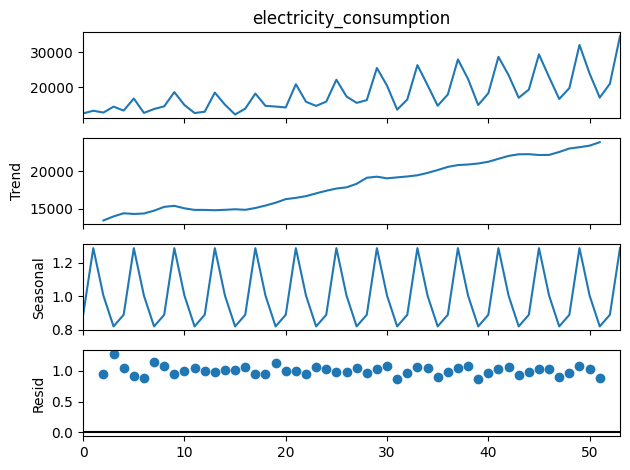%0A)

In \[392\]:

    #Detrend time series (optional)
    data['detrend_electricity_consumption'] = data['electricity_consumption'] / add_decompose.trend
    data.head(20)

Out\[392\]:

|     | quarter | electricity_consumption | year | Q   | detrend_electricity_consumption |
|-----|---------|-------------------------|------|-----|---------------------------------|
| 0   | 1387-Q1 | 12574                   | 1387 | Q1  | NaN                             |
| 1   | 1387-Q2 | 13338                   | 1387 | Q2  | NaN                             |
| 2   | 1387-Q3 | 12821                   | 1387 | Q3  | 0.955846                        |
| 3   | 1387-Q4 | 14511                   | 1387 | Q4  | 1.040029                        |
| 4   | 1388-Q1 | 13392                   | 1388 | Q1  | 0.931472                        |
| 5   | 1388-Q2 | 16834                   | 1388 | Q2  | 1.178800                        |
| 6   | 1388-Q3 | 12723                   | 1388 | Q3  | 0.886860                        |
| 7   | 1388-Q4 | 13836                   | 1388 | Q4  | 0.939706                        |
| 8   | 1389-Q1 | 14591                   | 1389 | Q1  | 0.957870                        |
| 9   | 1389-Q2 | 18656                   | 1389 | Q2  | 1.213754                        |
| 10  | 1389-Q3 | 14973                   | 1389 | Q3  | 0.995843                        |
| 11  | 1389-Q4 | 12688                   | 1389 | Q4  | 0.855751                        |
| 12  | 1390-Q1 | 13059                   | 1390 | Q1  | 0.881048                        |
| 13  | 1390-Q2 | 18518                   | 1390 | Q2  | 1.252782                        |
| 14  | 1390-Q3 | 15074                   | 1390 | Q3  | 1.015999                        |
| 15  | 1390-Q4 | 12262                   | 1390 | Q4  | 0.822291                        |
| 16  | 1391-Q1 | 13926                   | 1391 | Q1  | 0.938584                        |
| 17  | 1391-Q2 | 18254                   | 1391 | Q2  | 1.210477                        |
| 18  | 1391-Q3 | 14740                   | 1391 | Q3  | 0.956630                        |
| 19  | 1391-Q4 | 14538                   | 1391 | Q4  | 0.920986                        |





In \[393\]:

    #Seasonality analysis
    #Boxplot of detrend electricity_consumption vs. Q
    plt.figure(figsize = (10, 5))
    plt.boxplot([data.loc[(data['Q'] == _) &
                          (data['detrend_electricity_consumption'].notnull()),
                          'detrend_electricity_consumption'] for _ in data['Q'].unique()])
    plt.title('Seasonality Analysis - Detrend electricity_consumption')
    plt.axhline(y = 0, color = 'black', linewidth = 1)
    plt.xticks(ticks = range(1, 5), labels = data['Q'].unique())
    plt.xlabel('Q')
    plt.ylabel('Detrend electricity_consumption')
    plt.show()

![](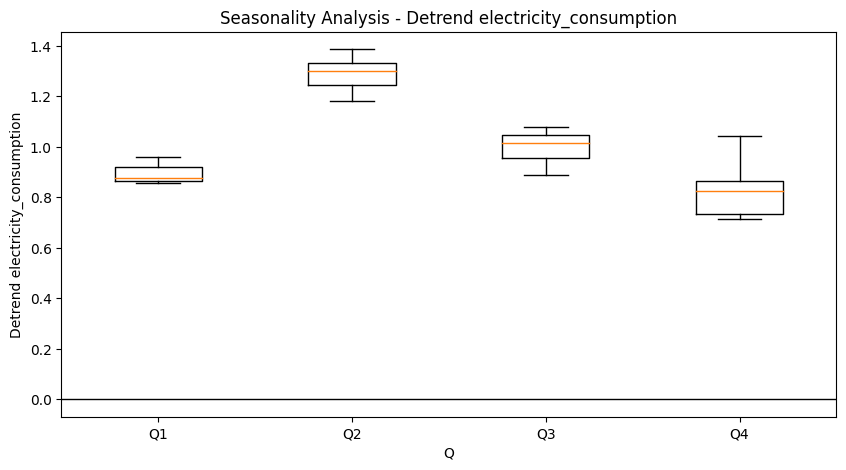%0A)

In \[394\]:

    #Calculate ACF and PACF up to 36 lags
    from statsmodels.tsa.stattools import acf, pacf
    acf_36 = acf(data['electricity_consumption'], nlags = 20)
    pacf_36 = pacf(data['electricity_consumption'], nlags = 20)
    print(acf_36)
    print(pacf_36)

    [ 1.          0.34624744 -0.06509466  0.34105417  0.82832785  0.25966017
     -0.09155808  0.26017073  0.67944702  0.18212313 -0.12497783  0.19571882
      0.55141331  0.09982554 -0.17365644  0.09959294  0.41578522  0.01711964
     -0.22054106 -0.00201872  0.27505431]
    [ 1.          0.35278041 -0.21935149  0.56103519  0.81554477 -0.25637903
     -0.13409028 -0.2646253   0.17720031 -0.03245087 -0.0184851  -0.03523885
      0.02060381 -0.15003031 -0.18857347 -0.2887813   0.03845145 -0.03180731
      0.04088854 -0.36031264 -0.20680204]

In \[395\]:

    #Plot ACF up to 36 lags
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(data['electricity_consumption'], lags = 16, bartlett_confint = False)
    plt.grid()
    plt.show()

![](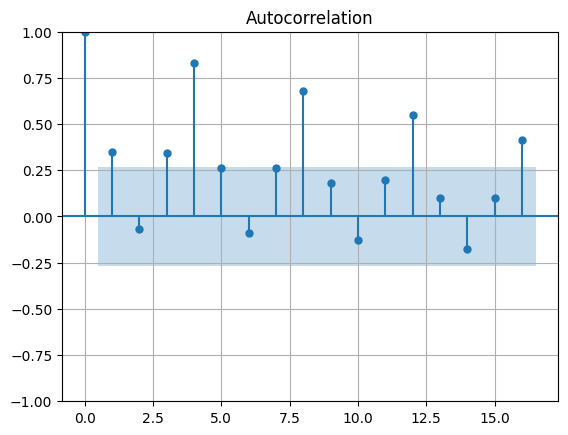%0A)

In \[396\]:

    #Plot PACF up to 36 lags
    from statsmodels.graphics.tsaplots import plot_pacf
    plot_pacf(data['electricity_consumption'], lags = 16, method = 'ywm')
    plt.grid()
    plt.show()

![](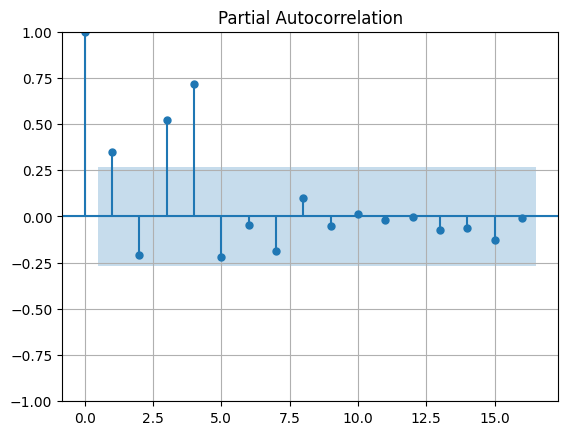%0A)

In \[397\]:

    #Scatter plot of lags (abs(auto-correlation) >= 0.25)
    lags = [1, 3, 4]
    plt.figure(figsize = (12, 10))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for i in range(1, 4):
        plt.subplot(3, 2, i)
        pd.plotting.lag_plot(data['electricity_consumption'], lag = lags[i - 1])
        plt.title('Lag ' + str(lags[i - 1]))

![](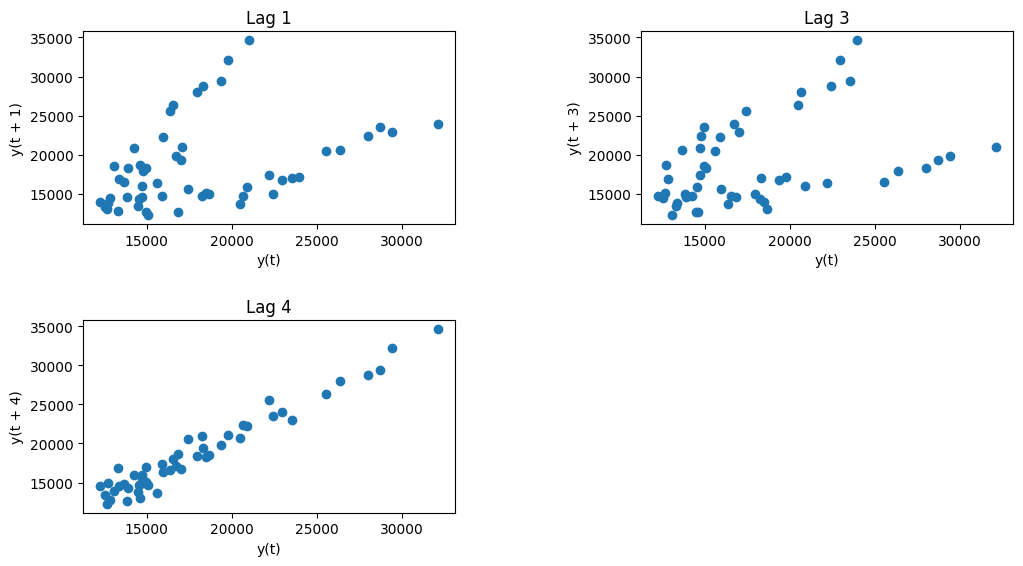%0A)

Data Preparation

In \[398\]:

    data.shape

Out\[398\]:

    (54, 5)

In \[399\]:

    #Add series trend
    data['trend'] = np.arange(1, data.shape[0] + 1)
    data.head()

Out\[399\]:

|     | quarter | electricity_consumption | year | Q   | detrend_electricity_consumption | trend |
|-----|---------|-------------------------|------|-----|---------------------------------|-------|
| 0   | 1387-Q1 | 12574                   | 1387 | Q1  | NaN                             | 1     |
| 1   | 1387-Q2 | 13338                   | 1387 | Q2  | NaN                             | 2     |
| 2   | 1387-Q3 | 12821                   | 1387 | Q3  | 0.955846                        | 3     |
| 3   | 1387-Q4 | 14511                   | 1387 | Q4  | 1.040029                        | 4     |
| 4   | 1388-Q1 | 13392                   | 1388 | Q1  | 0.931472                        | 5     |





In \[400\]:

    #Define dummy variables for month
    dummy_vars = pd.get_dummies(data['Q']).reindex(columns = data['Q'].unique()).astype(int)
    dummy_vars.drop(columns = 'Q1', inplace = True)
    dummy_vars.head()

Out\[400\]:

|     | Q2  | Q3  | Q4  |
|-----|-----|-----|-----|
| 0   | 0   | 0   | 0   |
| 1   | 1   | 0   | 0   |
| 2   | 0   | 1   | 0   |
| 3   | 0   | 0   | 1   |
| 4   | 0   | 0   | 0   |





In \[401\]:

    #Add dummy variables for seasonal component
    data = pd.concat([data, dummy_vars], axis = 1)
    data.head()

Out\[401\]:

|     | quarter | electricity_consumption | year | Q   | detrend_electricity_consumption | trend | Q2  | Q3  | Q4  |
|-----|---------|-------------------------|------|-----|---------------------------------|-------|-----|-----|-----|
| 0   | 1387-Q1 | 12574                   | 1387 | Q1  | NaN                             | 1     | 0   | 0   | 0   |
| 1   | 1387-Q2 | 13338                   | 1387 | Q2  | NaN                             | 2     | 1   | 0   | 0   |
| 2   | 1387-Q3 | 12821                   | 1387 | Q3  | 0.955846                        | 3     | 0   | 1   | 0   |
| 3   | 1387-Q4 | 14511                   | 1387 | Q4  | 1.040029                        | 4     | 0   | 0   | 1   |
| 4   | 1388-Q1 | 13392                   | 1388 | Q1  | 0.931472                        | 5     | 0   | 0   | 0   |





In \[402\]:

    #Add lags of sales as features
    lags = [1, 3, 4]
    for i in range(3):
        data['lag_' + str(lags[i])] = data['electricity_consumption'].shift(lags[i])
    data.head()

Out\[402\]:

|     | quarter | electricity_consumption | year | Q   | detrend_electricity_consumption | trend | Q2  | Q3  | Q4  | lag_1   | lag_3   | lag_4   |
|-----|---------|-------------------------|------|-----|---------------------------------|-------|-----|-----|-----|---------|---------|---------|
| 0   | 1387-Q1 | 12574                   | 1387 | Q1  | NaN                             | 1     | 0   | 0   | 0   | NaN     | NaN     | NaN     |
| 1   | 1387-Q2 | 13338                   | 1387 | Q2  | NaN                             | 2     | 1   | 0   | 0   | 12574.0 | NaN     | NaN     |
| 2   | 1387-Q3 | 12821                   | 1387 | Q3  | 0.955846                        | 3     | 0   | 1   | 0   | 13338.0 | NaN     | NaN     |
| 3   | 1387-Q4 | 14511                   | 1387 | Q4  | 1.040029                        | 4     | 0   | 0   | 1   | 12821.0 | 12574.0 | NaN     |
| 4   | 1388-Q1 | 13392                   | 1388 | Q1  | 0.931472                        | 5     | 0   | 0   | 0   | 14511.0 | 13338.0 | 12574.0 |





In \[404\]:

    #Drop detrend_sales columns
    data.drop(columns = 'detrend_electricity_consumption', inplace = True)

In \[406\]:

    #Drop rows with missing values
    data.dropna(axis = 0, inplace = True)

In \[407\]:

    data

Out\[407\]:

|     | quarter | electricity_consumption | year | Q   | trend | Q2  | Q3  | Q4  | lag_1   | lag_3   | lag_4   |
|-----|---------|-------------------------|------|-----|-------|-----|-----|-----|---------|---------|---------|
| 4   | 1388-Q1 | 13392                   | 1388 | Q1  | 5     | 0   | 0   | 0   | 14511.0 | 13338.0 | 12574.0 |
| 5   | 1388-Q2 | 16834                   | 1388 | Q2  | 6     | 1   | 0   | 0   | 13392.0 | 12821.0 | 13338.0 |
| 6   | 1388-Q3 | 12723                   | 1388 | Q3  | 7     | 0   | 1   | 0   | 16834.0 | 14511.0 | 12821.0 |
| 7   | 1388-Q4 | 13836                   | 1388 | Q4  | 8     | 0   | 0   | 1   | 12723.0 | 13392.0 | 14511.0 |
| 8   | 1389-Q1 | 14591                   | 1389 | Q1  | 9     | 0   | 0   | 0   | 13836.0 | 16834.0 | 13392.0 |
| 9   | 1389-Q2 | 18656                   | 1389 | Q2  | 10    | 1   | 0   | 0   | 14591.0 | 12723.0 | 16834.0 |
| 10  | 1389-Q3 | 14973                   | 1389 | Q3  | 11    | 0   | 1   | 0   | 18656.0 | 13836.0 | 12723.0 |
| 11  | 1389-Q4 | 12688                   | 1389 | Q4  | 12    | 0   | 0   | 1   | 14973.0 | 14591.0 | 13836.0 |
| 12  | 1390-Q1 | 13059                   | 1390 | Q1  | 13    | 0   | 0   | 0   | 12688.0 | 18656.0 | 14591.0 |
| 13  | 1390-Q2 | 18518                   | 1390 | Q2  | 14    | 1   | 0   | 0   | 13059.0 | 14973.0 | 18656.0 |
| 14  | 1390-Q3 | 15074                   | 1390 | Q3  | 15    | 0   | 1   | 0   | 18518.0 | 12688.0 | 14973.0 |
| 15  | 1390-Q4 | 12262                   | 1390 | Q4  | 16    | 0   | 0   | 1   | 15074.0 | 13059.0 | 12688.0 |
| 16  | 1391-Q1 | 13926                   | 1391 | Q1  | 17    | 0   | 0   | 0   | 12262.0 | 18518.0 | 13059.0 |
| 17  | 1391-Q2 | 18254                   | 1391 | Q2  | 18    | 1   | 0   | 0   | 13926.0 | 15074.0 | 18518.0 |
| 18  | 1391-Q3 | 14740                   | 1391 | Q3  | 19    | 0   | 1   | 0   | 18254.0 | 12262.0 | 15074.0 |
| 19  | 1391-Q4 | 14538                   | 1391 | Q4  | 20    | 0   | 0   | 1   | 14740.0 | 13926.0 | 12262.0 |
| 20  | 1392-Q1 | 14276                   | 1392 | Q1  | 21    | 0   | 0   | 0   | 14538.0 | 18254.0 | 13926.0 |
| 21  | 1392-Q2 | 20920                   | 1392 | Q2  | 22    | 1   | 0   | 0   | 14276.0 | 14740.0 | 18254.0 |
| 22  | 1392-Q3 | 15909                   | 1392 | Q3  | 23    | 0   | 1   | 0   | 20920.0 | 14538.0 | 14740.0 |
| 23  | 1392-Q4 | 14727                   | 1392 | Q4  | 24    | 0   | 0   | 1   | 15909.0 | 14276.0 | 14538.0 |
| 24  | 1393-Q1 | 15946                   | 1393 | Q1  | 25    | 0   | 0   | 0   | 14727.0 | 20920.0 | 14276.0 |
| 25  | 1393-Q2 | 22209                   | 1393 | Q2  | 26    | 1   | 0   | 0   | 15946.0 | 15909.0 | 20920.0 |
| 26  | 1393-Q3 | 17419                   | 1393 | Q3  | 27    | 0   | 1   | 0   | 22209.0 | 14727.0 | 15909.0 |
| 27  | 1393-Q4 | 15589                   | 1393 | Q4  | 28    | 0   | 0   | 1   | 17419.0 | 15946.0 | 14727.0 |
| 28  | 1394-Q1 | 16370                   | 1394 | Q1  | 29    | 0   | 0   | 0   | 15589.0 | 22209.0 | 15946.0 |
| 29  | 1394-Q2 | 25563                   | 1394 | Q2  | 30    | 1   | 0   | 0   | 16370.0 | 17419.0 | 22209.0 |
| 30  | 1394-Q3 | 20513                   | 1394 | Q3  | 31    | 0   | 1   | 0   | 25563.0 | 15589.0 | 17419.0 |
| 31  | 1394-Q4 | 13657                   | 1394 | Q4  | 32    | 0   | 0   | 1   | 20513.0 | 16370.0 | 15589.0 |
| 32  | 1395-Q1 | 16553                   | 1395 | Q1  | 33    | 0   | 0   | 0   | 13657.0 | 25563.0 | 16370.0 |
| 33  | 1395-Q2 | 26391                   | 1395 | Q2  | 34    | 1   | 0   | 0   | 16553.0 | 20513.0 | 25563.0 |
| 34  | 1395-Q3 | 20666                   | 1395 | Q3  | 35    | 0   | 1   | 0   | 26391.0 | 13657.0 | 20513.0 |
| 35  | 1395-Q4 | 14768                   | 1395 | Q4  | 36    | 0   | 0   | 1   | 20666.0 | 16553.0 | 13657.0 |
| 36  | 1396-Q1 | 17982                   | 1396 | Q1  | 37    | 0   | 0   | 0   | 14768.0 | 26391.0 | 16553.0 |
| 37  | 1396-Q2 | 28016                   | 1396 | Q2  | 38    | 1   | 0   | 0   | 17982.0 | 20666.0 | 26391.0 |
| 38  | 1396-Q3 | 22424                   | 1396 | Q3  | 39    | 0   | 1   | 0   | 28016.0 | 14768.0 | 20666.0 |
| 39  | 1396-Q4 | 14981                   | 1396 | Q4  | 40    | 0   | 0   | 1   | 22424.0 | 17982.0 | 14768.0 |
| 40  | 1397-Q1 | 18339                   | 1397 | Q1  | 41    | 0   | 0   | 0   | 14981.0 | 28016.0 | 17982.0 |
| 41  | 1397-Q2 | 28755                   | 1397 | Q2  | 42    | 1   | 0   | 0   | 18339.0 | 22424.0 | 28016.0 |
| 42  | 1397-Q3 | 23528                   | 1397 | Q3  | 43    | 0   | 1   | 0   | 28755.0 | 14981.0 | 22424.0 |
| 43  | 1397-Q4 | 17044                   | 1397 | Q4  | 44    | 0   | 0   | 1   | 23528.0 | 18339.0 | 14981.0 |
| 44  | 1398-Q1 | 19380                   | 1398 | Q1  | 45    | 0   | 0   | 0   | 17044.0 | 28755.0 | 18339.0 |
| 45  | 1398-Q2 | 29449                   | 1398 | Q2  | 46    | 1   | 0   | 0   | 19380.0 | 23528.0 | 28755.0 |
| 46  | 1398-Q3 | 22967                   | 1398 | Q3  | 47    | 0   | 1   | 0   | 29449.0 | 17044.0 | 23528.0 |
| 47  | 1398-Q4 | 16704                   | 1398 | Q4  | 48    | 0   | 0   | 1   | 22967.0 | 19380.0 | 17044.0 |
| 48  | 1399-Q1 | 19817                   | 1399 | Q1  | 49    | 0   | 0   | 0   | 16704.0 | 29449.0 | 19380.0 |
| 49  | 1399-Q2 | 32157                   | 1399 | Q2  | 50    | 1   | 0   | 0   | 19817.0 | 22967.0 | 29449.0 |
| 50  | 1399-Q3 | 23972                   | 1399 | Q3  | 51    | 0   | 1   | 0   | 32157.0 | 16704.0 | 22967.0 |
| 51  | 1399-Q4 | 17105                   | 1399 | Q4  | 52    | 0   | 0   | 1   | 23972.0 | 19817.0 | 16704.0 |
| 52  | 1400-Q1 | 21045                   | 1400 | Q1  | 53    | 0   | 0   | 0   | 17105.0 | 32157.0 | 19817.0 |
| 53  | 1400-Q2 | 34645                   | 1400 | Q2  | 54    | 1   | 0   | 0   | 21045.0 | 23972.0 | 32157.0 |





In \[408\]:

    data.head()

Out\[408\]:

|     | quarter | electricity_consumption | year | Q   | trend | Q2  | Q3  | Q4  | lag_1   | lag_3   | lag_4   |
|-----|---------|-------------------------|------|-----|-------|-----|-----|-----|---------|---------|---------|
| 4   | 1388-Q1 | 13392                   | 1388 | Q1  | 5     | 0   | 0   | 0   | 14511.0 | 13338.0 | 12574.0 |
| 5   | 1388-Q2 | 16834                   | 1388 | Q2  | 6     | 1   | 0   | 0   | 13392.0 | 12821.0 | 13338.0 |
| 6   | 1388-Q3 | 12723                   | 1388 | Q3  | 7     | 0   | 1   | 0   | 16834.0 | 14511.0 | 12821.0 |
| 7   | 1388-Q4 | 13836                   | 1388 | Q4  | 8     | 0   | 0   | 1   | 12723.0 | 13392.0 | 14511.0 |
| 8   | 1389-Q1 | 14591                   | 1389 | Q1  | 9     | 0   | 0   | 0   | 13836.0 | 16834.0 | 13392.0 |





In \[409\]:

    data.tail()

Out\[409\]:

|     | quarter | electricity_consumption | year | Q   | trend | Q2  | Q3  | Q4  | lag_1   | lag_3   | lag_4   |
|-----|---------|-------------------------|------|-----|-------|-----|-----|-----|---------|---------|---------|
| 49  | 1399-Q2 | 32157                   | 1399 | Q2  | 50    | 1   | 0   | 0   | 19817.0 | 22967.0 | 29449.0 |
| 50  | 1399-Q3 | 23972                   | 1399 | Q3  | 51    | 0   | 1   | 0   | 32157.0 | 16704.0 | 22967.0 |
| 51  | 1399-Q4 | 17105                   | 1399 | Q4  | 52    | 0   | 0   | 1   | 23972.0 | 19817.0 | 16704.0 |
| 52  | 1400-Q1 | 21045                   | 1400 | Q1  | 53    | 0   | 0   | 0   | 17105.0 | 32157.0 | 19817.0 |
| 53  | 1400-Q2 | 34645                   | 1400 | Q2  | 54    | 1   | 0   | 0   | 21045.0 | 23972.0 | 32157.0 |





In \[410\]:

    #Reset index
    data.index = range(data.shape[0])
    data

Out\[410\]:

|     | quarter | electricity_consumption | year | Q   | trend | Q2  | Q3  | Q4  | lag_1   | lag_3   | lag_4   |
|-----|---------|-------------------------|------|-----|-------|-----|-----|-----|---------|---------|---------|
| 0   | 1388-Q1 | 13392                   | 1388 | Q1  | 5     | 0   | 0   | 0   | 14511.0 | 13338.0 | 12574.0 |
| 1   | 1388-Q2 | 16834                   | 1388 | Q2  | 6     | 1   | 0   | 0   | 13392.0 | 12821.0 | 13338.0 |
| 2   | 1388-Q3 | 12723                   | 1388 | Q3  | 7     | 0   | 1   | 0   | 16834.0 | 14511.0 | 12821.0 |
| 3   | 1388-Q4 | 13836                   | 1388 | Q4  | 8     | 0   | 0   | 1   | 12723.0 | 13392.0 | 14511.0 |
| 4   | 1389-Q1 | 14591                   | 1389 | Q1  | 9     | 0   | 0   | 0   | 13836.0 | 16834.0 | 13392.0 |
| 5   | 1389-Q2 | 18656                   | 1389 | Q2  | 10    | 1   | 0   | 0   | 14591.0 | 12723.0 | 16834.0 |
| 6   | 1389-Q3 | 14973                   | 1389 | Q3  | 11    | 0   | 1   | 0   | 18656.0 | 13836.0 | 12723.0 |
| 7   | 1389-Q4 | 12688                   | 1389 | Q4  | 12    | 0   | 0   | 1   | 14973.0 | 14591.0 | 13836.0 |
| 8   | 1390-Q1 | 13059                   | 1390 | Q1  | 13    | 0   | 0   | 0   | 12688.0 | 18656.0 | 14591.0 |
| 9   | 1390-Q2 | 18518                   | 1390 | Q2  | 14    | 1   | 0   | 0   | 13059.0 | 14973.0 | 18656.0 |
| 10  | 1390-Q3 | 15074                   | 1390 | Q3  | 15    | 0   | 1   | 0   | 18518.0 | 12688.0 | 14973.0 |
| 11  | 1390-Q4 | 12262                   | 1390 | Q4  | 16    | 0   | 0   | 1   | 15074.0 | 13059.0 | 12688.0 |
| 12  | 1391-Q1 | 13926                   | 1391 | Q1  | 17    | 0   | 0   | 0   | 12262.0 | 18518.0 | 13059.0 |
| 13  | 1391-Q2 | 18254                   | 1391 | Q2  | 18    | 1   | 0   | 0   | 13926.0 | 15074.0 | 18518.0 |
| 14  | 1391-Q3 | 14740                   | 1391 | Q3  | 19    | 0   | 1   | 0   | 18254.0 | 12262.0 | 15074.0 |
| 15  | 1391-Q4 | 14538                   | 1391 | Q4  | 20    | 0   | 0   | 1   | 14740.0 | 13926.0 | 12262.0 |
| 16  | 1392-Q1 | 14276                   | 1392 | Q1  | 21    | 0   | 0   | 0   | 14538.0 | 18254.0 | 13926.0 |
| 17  | 1392-Q2 | 20920                   | 1392 | Q2  | 22    | 1   | 0   | 0   | 14276.0 | 14740.0 | 18254.0 |
| 18  | 1392-Q3 | 15909                   | 1392 | Q3  | 23    | 0   | 1   | 0   | 20920.0 | 14538.0 | 14740.0 |
| 19  | 1392-Q4 | 14727                   | 1392 | Q4  | 24    | 0   | 0   | 1   | 15909.0 | 14276.0 | 14538.0 |
| 20  | 1393-Q1 | 15946                   | 1393 | Q1  | 25    | 0   | 0   | 0   | 14727.0 | 20920.0 | 14276.0 |
| 21  | 1393-Q2 | 22209                   | 1393 | Q2  | 26    | 1   | 0   | 0   | 15946.0 | 15909.0 | 20920.0 |
| 22  | 1393-Q3 | 17419                   | 1393 | Q3  | 27    | 0   | 1   | 0   | 22209.0 | 14727.0 | 15909.0 |
| 23  | 1393-Q4 | 15589                   | 1393 | Q4  | 28    | 0   | 0   | 1   | 17419.0 | 15946.0 | 14727.0 |
| 24  | 1394-Q1 | 16370                   | 1394 | Q1  | 29    | 0   | 0   | 0   | 15589.0 | 22209.0 | 15946.0 |
| 25  | 1394-Q2 | 25563                   | 1394 | Q2  | 30    | 1   | 0   | 0   | 16370.0 | 17419.0 | 22209.0 |
| 26  | 1394-Q3 | 20513                   | 1394 | Q3  | 31    | 0   | 1   | 0   | 25563.0 | 15589.0 | 17419.0 |
| 27  | 1394-Q4 | 13657                   | 1394 | Q4  | 32    | 0   | 0   | 1   | 20513.0 | 16370.0 | 15589.0 |
| 28  | 1395-Q1 | 16553                   | 1395 | Q1  | 33    | 0   | 0   | 0   | 13657.0 | 25563.0 | 16370.0 |
| 29  | 1395-Q2 | 26391                   | 1395 | Q2  | 34    | 1   | 0   | 0   | 16553.0 | 20513.0 | 25563.0 |
| 30  | 1395-Q3 | 20666                   | 1395 | Q3  | 35    | 0   | 1   | 0   | 26391.0 | 13657.0 | 20513.0 |
| 31  | 1395-Q4 | 14768                   | 1395 | Q4  | 36    | 0   | 0   | 1   | 20666.0 | 16553.0 | 13657.0 |
| 32  | 1396-Q1 | 17982                   | 1396 | Q1  | 37    | 0   | 0   | 0   | 14768.0 | 26391.0 | 16553.0 |
| 33  | 1396-Q2 | 28016                   | 1396 | Q2  | 38    | 1   | 0   | 0   | 17982.0 | 20666.0 | 26391.0 |
| 34  | 1396-Q3 | 22424                   | 1396 | Q3  | 39    | 0   | 1   | 0   | 28016.0 | 14768.0 | 20666.0 |
| 35  | 1396-Q4 | 14981                   | 1396 | Q4  | 40    | 0   | 0   | 1   | 22424.0 | 17982.0 | 14768.0 |
| 36  | 1397-Q1 | 18339                   | 1397 | Q1  | 41    | 0   | 0   | 0   | 14981.0 | 28016.0 | 17982.0 |
| 37  | 1397-Q2 | 28755                   | 1397 | Q2  | 42    | 1   | 0   | 0   | 18339.0 | 22424.0 | 28016.0 |
| 38  | 1397-Q3 | 23528                   | 1397 | Q3  | 43    | 0   | 1   | 0   | 28755.0 | 14981.0 | 22424.0 |
| 39  | 1397-Q4 | 17044                   | 1397 | Q4  | 44    | 0   | 0   | 1   | 23528.0 | 18339.0 | 14981.0 |
| 40  | 1398-Q1 | 19380                   | 1398 | Q1  | 45    | 0   | 0   | 0   | 17044.0 | 28755.0 | 18339.0 |
| 41  | 1398-Q2 | 29449                   | 1398 | Q2  | 46    | 1   | 0   | 0   | 19380.0 | 23528.0 | 28755.0 |
| 42  | 1398-Q3 | 22967                   | 1398 | Q3  | 47    | 0   | 1   | 0   | 29449.0 | 17044.0 | 23528.0 |
| 43  | 1398-Q4 | 16704                   | 1398 | Q4  | 48    | 0   | 0   | 1   | 22967.0 | 19380.0 | 17044.0 |
| 44  | 1399-Q1 | 19817                   | 1399 | Q1  | 49    | 0   | 0   | 0   | 16704.0 | 29449.0 | 19380.0 |
| 45  | 1399-Q2 | 32157                   | 1399 | Q2  | 50    | 1   | 0   | 0   | 19817.0 | 22967.0 | 29449.0 |
| 46  | 1399-Q3 | 23972                   | 1399 | Q3  | 51    | 0   | 1   | 0   | 32157.0 | 16704.0 | 22967.0 |
| 47  | 1399-Q4 | 17105                   | 1399 | Q4  | 52    | 0   | 0   | 1   | 23972.0 | 19817.0 | 16704.0 |
| 48  | 1400-Q1 | 21045                   | 1400 | Q1  | 53    | 0   | 0   | 0   | 17105.0 | 32157.0 | 19817.0 |
| 49  | 1400-Q2 | 34645                   | 1400 | Q2  | 54    | 1   | 0   | 0   | 21045.0 | 23972.0 | 32157.0 |





Build Forecasting Models

In \[411\]:

    #Split data into test and train
    forecast_horizon = 6
    train = data.iloc[: -forecast_horizon, :]
    test = data.iloc[-forecast_horizon : , :]

In \[412\]:

    #Check train
    train

Out\[412\]:

|     | quarter | electricity_consumption | year | Q   | trend | Q2  | Q3  | Q4  | lag_1   | lag_3   | lag_4   |
|-----|---------|-------------------------|------|-----|-------|-----|-----|-----|---------|---------|---------|
| 0   | 1388-Q1 | 13392                   | 1388 | Q1  | 5     | 0   | 0   | 0   | 14511.0 | 13338.0 | 12574.0 |
| 1   | 1388-Q2 | 16834                   | 1388 | Q2  | 6     | 1   | 0   | 0   | 13392.0 | 12821.0 | 13338.0 |
| 2   | 1388-Q3 | 12723                   | 1388 | Q3  | 7     | 0   | 1   | 0   | 16834.0 | 14511.0 | 12821.0 |
| 3   | 1388-Q4 | 13836                   | 1388 | Q4  | 8     | 0   | 0   | 1   | 12723.0 | 13392.0 | 14511.0 |
| 4   | 1389-Q1 | 14591                   | 1389 | Q1  | 9     | 0   | 0   | 0   | 13836.0 | 16834.0 | 13392.0 |
| 5   | 1389-Q2 | 18656                   | 1389 | Q2  | 10    | 1   | 0   | 0   | 14591.0 | 12723.0 | 16834.0 |
| 6   | 1389-Q3 | 14973                   | 1389 | Q3  | 11    | 0   | 1   | 0   | 18656.0 | 13836.0 | 12723.0 |
| 7   | 1389-Q4 | 12688                   | 1389 | Q4  | 12    | 0   | 0   | 1   | 14973.0 | 14591.0 | 13836.0 |
| 8   | 1390-Q1 | 13059                   | 1390 | Q1  | 13    | 0   | 0   | 0   | 12688.0 | 18656.0 | 14591.0 |
| 9   | 1390-Q2 | 18518                   | 1390 | Q2  | 14    | 1   | 0   | 0   | 13059.0 | 14973.0 | 18656.0 |
| 10  | 1390-Q3 | 15074                   | 1390 | Q3  | 15    | 0   | 1   | 0   | 18518.0 | 12688.0 | 14973.0 |
| 11  | 1390-Q4 | 12262                   | 1390 | Q4  | 16    | 0   | 0   | 1   | 15074.0 | 13059.0 | 12688.0 |
| 12  | 1391-Q1 | 13926                   | 1391 | Q1  | 17    | 0   | 0   | 0   | 12262.0 | 18518.0 | 13059.0 |
| 13  | 1391-Q2 | 18254                   | 1391 | Q2  | 18    | 1   | 0   | 0   | 13926.0 | 15074.0 | 18518.0 |
| 14  | 1391-Q3 | 14740                   | 1391 | Q3  | 19    | 0   | 1   | 0   | 18254.0 | 12262.0 | 15074.0 |
| 15  | 1391-Q4 | 14538                   | 1391 | Q4  | 20    | 0   | 0   | 1   | 14740.0 | 13926.0 | 12262.0 |
| 16  | 1392-Q1 | 14276                   | 1392 | Q1  | 21    | 0   | 0   | 0   | 14538.0 | 18254.0 | 13926.0 |
| 17  | 1392-Q2 | 20920                   | 1392 | Q2  | 22    | 1   | 0   | 0   | 14276.0 | 14740.0 | 18254.0 |
| 18  | 1392-Q3 | 15909                   | 1392 | Q3  | 23    | 0   | 1   | 0   | 20920.0 | 14538.0 | 14740.0 |
| 19  | 1392-Q4 | 14727                   | 1392 | Q4  | 24    | 0   | 0   | 1   | 15909.0 | 14276.0 | 14538.0 |
| 20  | 1393-Q1 | 15946                   | 1393 | Q1  | 25    | 0   | 0   | 0   | 14727.0 | 20920.0 | 14276.0 |
| 21  | 1393-Q2 | 22209                   | 1393 | Q2  | 26    | 1   | 0   | 0   | 15946.0 | 15909.0 | 20920.0 |
| 22  | 1393-Q3 | 17419                   | 1393 | Q3  | 27    | 0   | 1   | 0   | 22209.0 | 14727.0 | 15909.0 |
| 23  | 1393-Q4 | 15589                   | 1393 | Q4  | 28    | 0   | 0   | 1   | 17419.0 | 15946.0 | 14727.0 |
| 24  | 1394-Q1 | 16370                   | 1394 | Q1  | 29    | 0   | 0   | 0   | 15589.0 | 22209.0 | 15946.0 |
| 25  | 1394-Q2 | 25563                   | 1394 | Q2  | 30    | 1   | 0   | 0   | 16370.0 | 17419.0 | 22209.0 |
| 26  | 1394-Q3 | 20513                   | 1394 | Q3  | 31    | 0   | 1   | 0   | 25563.0 | 15589.0 | 17419.0 |
| 27  | 1394-Q4 | 13657                   | 1394 | Q4  | 32    | 0   | 0   | 1   | 20513.0 | 16370.0 | 15589.0 |
| 28  | 1395-Q1 | 16553                   | 1395 | Q1  | 33    | 0   | 0   | 0   | 13657.0 | 25563.0 | 16370.0 |
| 29  | 1395-Q2 | 26391                   | 1395 | Q2  | 34    | 1   | 0   | 0   | 16553.0 | 20513.0 | 25563.0 |
| 30  | 1395-Q3 | 20666                   | 1395 | Q3  | 35    | 0   | 1   | 0   | 26391.0 | 13657.0 | 20513.0 |
| 31  | 1395-Q4 | 14768                   | 1395 | Q4  | 36    | 0   | 0   | 1   | 20666.0 | 16553.0 | 13657.0 |
| 32  | 1396-Q1 | 17982                   | 1396 | Q1  | 37    | 0   | 0   | 0   | 14768.0 | 26391.0 | 16553.0 |
| 33  | 1396-Q2 | 28016                   | 1396 | Q2  | 38    | 1   | 0   | 0   | 17982.0 | 20666.0 | 26391.0 |
| 34  | 1396-Q3 | 22424                   | 1396 | Q3  | 39    | 0   | 1   | 0   | 28016.0 | 14768.0 | 20666.0 |
| 35  | 1396-Q4 | 14981                   | 1396 | Q4  | 40    | 0   | 0   | 1   | 22424.0 | 17982.0 | 14768.0 |
| 36  | 1397-Q1 | 18339                   | 1397 | Q1  | 41    | 0   | 0   | 0   | 14981.0 | 28016.0 | 17982.0 |
| 37  | 1397-Q2 | 28755                   | 1397 | Q2  | 42    | 1   | 0   | 0   | 18339.0 | 22424.0 | 28016.0 |
| 38  | 1397-Q3 | 23528                   | 1397 | Q3  | 43    | 0   | 1   | 0   | 28755.0 | 14981.0 | 22424.0 |
| 39  | 1397-Q4 | 17044                   | 1397 | Q4  | 44    | 0   | 0   | 1   | 23528.0 | 18339.0 | 14981.0 |
| 40  | 1398-Q1 | 19380                   | 1398 | Q1  | 45    | 0   | 0   | 0   | 17044.0 | 28755.0 | 18339.0 |
| 41  | 1398-Q2 | 29449                   | 1398 | Q2  | 46    | 1   | 0   | 0   | 19380.0 | 23528.0 | 28755.0 |
| 42  | 1398-Q3 | 22967                   | 1398 | Q3  | 47    | 0   | 1   | 0   | 29449.0 | 17044.0 | 23528.0 |
| 43  | 1398-Q4 | 16704                   | 1398 | Q4  | 48    | 0   | 0   | 1   | 22967.0 | 19380.0 | 17044.0 |





In \[413\]:

    #Check test
    test

Out\[413\]:

|     | quarter | electricity_consumption | year | Q   | trend | Q2  | Q3  | Q4  | lag_1   | lag_3   | lag_4   |
|-----|---------|-------------------------|------|-----|-------|-----|-----|-----|---------|---------|---------|
| 44  | 1399-Q1 | 19817                   | 1399 | Q1  | 49    | 0   | 0   | 0   | 16704.0 | 29449.0 | 19380.0 |
| 45  | 1399-Q2 | 32157                   | 1399 | Q2  | 50    | 1   | 0   | 0   | 19817.0 | 22967.0 | 29449.0 |
| 46  | 1399-Q3 | 23972                   | 1399 | Q3  | 51    | 0   | 1   | 0   | 32157.0 | 16704.0 | 22967.0 |
| 47  | 1399-Q4 | 17105                   | 1399 | Q4  | 52    | 0   | 0   | 1   | 23972.0 | 19817.0 | 16704.0 |
| 48  | 1400-Q1 | 21045                   | 1400 | Q1  | 53    | 0   | 0   | 0   | 17105.0 | 32157.0 | 19817.0 |
| 49  | 1400-Q2 | 34645                   | 1400 | Q2  | 54    | 1   | 0   | 0   | 21045.0 | 23972.0 | 32157.0 |





Exponential Smoothing with Fixed Window

In \[414\]:

    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    es = ExponentialSmoothing(train['electricity_consumption'],
                              trend = 'mul', #'add', 'mul', or None
                              damped_trend = False, #    Should the trend component be damped
                              seasonal = 'mul', #'add', 'mul', or None
                              seasonal_periods = 4, #The number of periods in a complete seasonal cycle
                              initialization_method = 'estimated', #Method for initialize the recursions
                              initial_level = None, #The initial level component
                              initial_trend = None, #The initial trend component
                              initial_seasonal = None) #The initial seasonal component
    model_1 = es.fit()

    /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
      return err.T @ err
    /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
      warnings.warn(

In \[415\]:

    #Model parameters
    model_1.params

Out\[415\]:

    {'smoothing_level': 0.1464285714139286,
     'smoothing_trend': 0.14642857139928572,
     'smoothing_seasonal': 0.5909340659704672,
     'damping_trend': nan,
     'initial_level': 14829.666666039913,
     'initial_trend': 1.0321008018934095,
     'initial_seasons': array([0.91426498, 1.23845018, 0.96490181, 0.8849824 ]),
     'use_boxcox': False,
     'lamda': None,
     'remove_bias': False}

In \[416\]:

    #Predict on test - model 1
    pred_es_fw = model_1.forecast(steps = 6)
    pred_es_fw

Out\[416\]:

    44    19957.248521
    45    30665.007011
    46    24317.697971
    47    17953.528220
    48    20800.522078
    49    31960.726183
    dtype: float64

In \[417\]:

    #Absolute error
    abs_err_es_fw = abs(test['electricity_consumption'] - pred_es_fw)
    abs_pct_err_es_fw = np.round(abs(test['electricity_consumption'] - pred_es_fw) / test['electricity_consumption'] * 100, 1)

    #Absolute error mean, median, sd, IQR, max, min, and MAPE
    from scipy.stats import iqr
    models_comp = pd.DataFrame({'Mean of AbsErrors':    abs_err_es_fw.mean(),
                                'Median of AbsErrors' : abs_err_es_fw.median(),
                                'SD of AbsErrors' :     abs_err_es_fw.std(),
                                'IQR of AbsErrors':     iqr(abs_err_es_fw),
                                'Min of AbsErrors':     abs_err_es_fw.min(),
                                'Max of AbsErrors':     abs_err_es_fw.max(),
                                'MAPE': abs_pct_err_es_fw.mean()},
                               index = ['Exponential Smoothing - Fixed Window'])
    models_comp

Out\[417\]:

|                                      | Mean of AbsErrors | Median of AbsErrors | SD of AbsErrors | IQR of AbsErrors | Min of AbsErrors | Max of AbsErrors | MAPE     |
|--------------------------------------|-------------------|---------------------|-----------------|------------------|------------------|------------------|----------|
| Exponential Smoothing - Fixed Window | 959.20324         | 597.113095          | 982.841818      | 1061.343863      | 140.248521       | 2684.273817      | 3.433333 |



In \[418\]:

    #Actual vs. Prediction
    plt.figure(figsize = (10, 5))
    plt.plot(test['electricity_consumption'],
             color = 'grey', alpha = 0.8, label = 'Actual')
    plt.plot(pred_es_fw,
             color = 'red', alpha = 0.8, label = 'Prediction')
    plt.title('Iran Quarterly Electricity Consumption: \n Actual vs. Predition')
    plt.xlabel('Year')
    plt.ylabel('Units')

    plt.legend()
    plt.grid()
    plt.show()

![](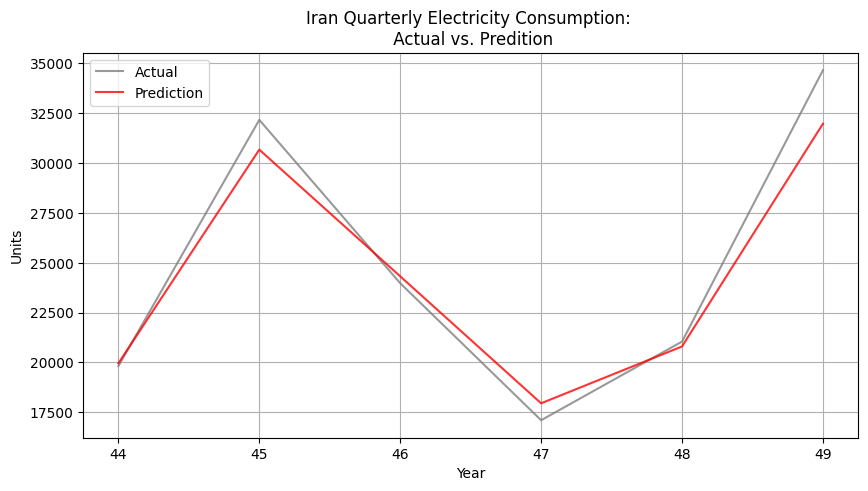%0A)

Exponential Smoothing with Expanding Window

In \[419\]:

    #Expanding window
    history = list(train['electricity_consumption'])
    pred_es_ew = []
    for t in test.index:
        es = ExponentialSmoothing(history,
                                  trend = 'mul', #'add', 'mul', or None
                                  damped_trend = False, #    Should the trend component be damped
                                  seasonal = 'mul', #'add', 'mul', or None
                                  seasonal_periods = 4, #The number of periods in a complete seasonal cycle
                                  initialization_method = 'estimated', #Method for initialize the recursions
                                  initial_level = None, #The initial level component
                                  initial_trend = None, #The initial trend component
                                  initial_seasonal = None) #The initial seasonal component
        model = es.fit()
        pred_es_ew.append(model.forecast(steps = 1)[0])
        history.append(test.loc[t, 'electricity_consumption'])

    /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
      return err.T @ err
    /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
      warnings.warn(
    /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
      warnings.warn(
    /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
      warnings.warn(
    /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
      warnings.warn(
    /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
      warnings.warn(
    /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
      warnings.warn(

In \[420\]:

    #Check the results
    pred_es_ew = pd.Series(pred_es_ew, index = test.index)
    pred_es_ew

Out\[420\]:

    44    19957.248521
    45    30628.754411
    46    24522.811153
    47    17657.218650
    48    20701.715722
    49    32916.890573
    dtype: float64

In \[421\]:

    #Absolute error
    abs_err_es_ew = abs(test['electricity_consumption'] - pred_es_ew)
    abs_pct_err_es_ew = np.round(abs(test['electricity_consumption'] - pred_es_ew) / test['electricity_consumption'] * 100, 1)

    #Absolute error mean, median, sd, IQR, max, min, and MAPE
    from scipy.stats import iqr
    models_comp =  pd.concat([models_comp,
                              pd.DataFrame({'Mean of AbsErrors':    abs_err_es_ew.mean(),
                                            'Median of AbsErrors' : abs_err_es_ew.median(),
                                            'SD of AbsErrors' :     abs_err_es_ew.std(),
                                            'IQR of AbsErrors':     iqr(abs_err_es_ew),
                                            'Min of AbsErrors':     abs_err_es_ew.min(),
                                            'Max of AbsErrors':     abs_err_es_ew.max(),
                                            'MAPE': abs_pct_err_es_ew.mean()},
                                           index = ['Exponential Smoothing - Expanding Window'])])
    models_comp

Out\[421\]:

|                                          | Mean of AbsErrors | Median of AbsErrors | SD of AbsErrors | IQR of AbsErrors | Min of AbsErrors | Max of AbsErrors | MAPE     |
|------------------------------------------|-------------------|---------------------|-----------------|------------------|------------------|------------------|----------|
| Exponential Smoothing - Fixed Window     | 959.203240        | 597.113095          | 982.841818      | 1061.343863      | 140.248521       | 2684.273817      | 3.433333 |
| Exponential Smoothing - Expanding Window | 807.152936        | 551.514901          | 657.080467      | 889.072857       | 140.248521       | 1728.109427      | 2.933333 |





In \[422\]:

    #Actual vs. Prediction
    plt.figure(figsize = (10, 5))
    plt.plot(test['electricity_consumption'],
             color = 'grey', alpha = 0.8, label = 'Actual')
    plt.plot(pred_es_ew,
             color = 'red', alpha = 0.8, label = 'Prediction')
    plt.title('Iran Quarterly Electricity Consumption: \n Actual vs. Predition: \n Actual vs. Predition')
    plt.xlabel('Year')
    plt.ylabel('Units')

    plt.legend()
    plt.grid()
    plt.show()

![](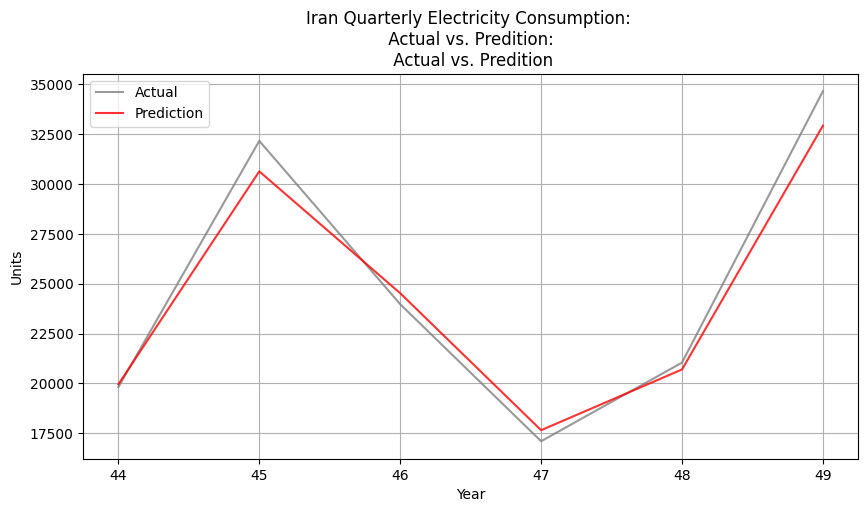%0A)

Forward Selection with Expanding Window

In \[423\]:

    #Define function to fit linear regression
    def fit_lm(feature_set, y, X):
        reg_model = sm.OLS(y, X[['const'] + list(feature_set)]).fit()
        return {'model': reg_model,
                'r2': reg_model.rsquared,
                'adj_r2': reg_model.rsquared_adj,
                'aic': reg_model.aic,
                'bic': reg_model.bic}

    #Define function to do forward selection
    def fwd_selection(features, y, X):
        res = []
        #Pull out features still needed to process
        remaining_features = [_ for _ in X.iloc[:, 1:].columns if _ not in features]

        #Fit linear model and save the results
        for f in remaining_features:
            res.append(fit_lm(features + [f], y, X))

        models = pd.DataFrame(res)

        #Choose the model with the highest R squared
        best_model = models.iloc[models['r2'].argmax()]

        #Return the best model
        return best_model

In \[424\]:

    train.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 44 entries, 0 to 43
    Data columns (total 11 columns):
     #   Column                   Non-Null Count  Dtype  
    ---  ------                   --------------  -----  
     0   quarter                  44 non-null     object
     1   electricity_consumption  44 non-null     int64  
     2   year                     44 non-null     int64  
     3   Q                        44 non-null     object
     4   trend                    44 non-null     int64  
     5   Q2                       44 non-null     int64  
     6   Q3                       44 non-null     int64  
     7   Q4                       44 non-null     int64  
     8   lag_1                    44 non-null     float64
     9   lag_3                    44 non-null     float64
     10  lag_4                    44 non-null     float64
    dtypes: float64(3), int64(6), object(2)
    memory usage: 3.9+ KB

In \[425\]:

    #Define feature matrix for train
    import statsmodels.api as sm
    X_train = train.iloc[:, 4:]
    X_train = sm.add_constant(X_train)
    X_train

Out\[425\]:

|     | const | trend | Q2  | Q3  | Q4  | lag_1   | lag_3   | lag_4   |
|-----|-------|-------|-----|-----|-----|---------|---------|---------|
| 0   | 1.0   | 5     | 0   | 0   | 0   | 14511.0 | 13338.0 | 12574.0 |
| 1   | 1.0   | 6     | 1   | 0   | 0   | 13392.0 | 12821.0 | 13338.0 |
| 2   | 1.0   | 7     | 0   | 1   | 0   | 16834.0 | 14511.0 | 12821.0 |
| 3   | 1.0   | 8     | 0   | 0   | 1   | 12723.0 | 13392.0 | 14511.0 |
| 4   | 1.0   | 9     | 0   | 0   | 0   | 13836.0 | 16834.0 | 13392.0 |
| 5   | 1.0   | 10    | 1   | 0   | 0   | 14591.0 | 12723.0 | 16834.0 |
| 6   | 1.0   | 11    | 0   | 1   | 0   | 18656.0 | 13836.0 | 12723.0 |
| 7   | 1.0   | 12    | 0   | 0   | 1   | 14973.0 | 14591.0 | 13836.0 |
| 8   | 1.0   | 13    | 0   | 0   | 0   | 12688.0 | 18656.0 | 14591.0 |
| 9   | 1.0   | 14    | 1   | 0   | 0   | 13059.0 | 14973.0 | 18656.0 |
| 10  | 1.0   | 15    | 0   | 1   | 0   | 18518.0 | 12688.0 | 14973.0 |
| 11  | 1.0   | 16    | 0   | 0   | 1   | 15074.0 | 13059.0 | 12688.0 |
| 12  | 1.0   | 17    | 0   | 0   | 0   | 12262.0 | 18518.0 | 13059.0 |
| 13  | 1.0   | 18    | 1   | 0   | 0   | 13926.0 | 15074.0 | 18518.0 |
| 14  | 1.0   | 19    | 0   | 1   | 0   | 18254.0 | 12262.0 | 15074.0 |
| 15  | 1.0   | 20    | 0   | 0   | 1   | 14740.0 | 13926.0 | 12262.0 |
| 16  | 1.0   | 21    | 0   | 0   | 0   | 14538.0 | 18254.0 | 13926.0 |
| 17  | 1.0   | 22    | 1   | 0   | 0   | 14276.0 | 14740.0 | 18254.0 |
| 18  | 1.0   | 23    | 0   | 1   | 0   | 20920.0 | 14538.0 | 14740.0 |
| 19  | 1.0   | 24    | 0   | 0   | 1   | 15909.0 | 14276.0 | 14538.0 |
| 20  | 1.0   | 25    | 0   | 0   | 0   | 14727.0 | 20920.0 | 14276.0 |
| 21  | 1.0   | 26    | 1   | 0   | 0   | 15946.0 | 15909.0 | 20920.0 |
| 22  | 1.0   | 27    | 0   | 1   | 0   | 22209.0 | 14727.0 | 15909.0 |
| 23  | 1.0   | 28    | 0   | 0   | 1   | 17419.0 | 15946.0 | 14727.0 |
| 24  | 1.0   | 29    | 0   | 0   | 0   | 15589.0 | 22209.0 | 15946.0 |
| 25  | 1.0   | 30    | 1   | 0   | 0   | 16370.0 | 17419.0 | 22209.0 |
| 26  | 1.0   | 31    | 0   | 1   | 0   | 25563.0 | 15589.0 | 17419.0 |
| 27  | 1.0   | 32    | 0   | 0   | 1   | 20513.0 | 16370.0 | 15589.0 |
| 28  | 1.0   | 33    | 0   | 0   | 0   | 13657.0 | 25563.0 | 16370.0 |
| 29  | 1.0   | 34    | 1   | 0   | 0   | 16553.0 | 20513.0 | 25563.0 |
| 30  | 1.0   | 35    | 0   | 1   | 0   | 26391.0 | 13657.0 | 20513.0 |
| 31  | 1.0   | 36    | 0   | 0   | 1   | 20666.0 | 16553.0 | 13657.0 |
| 32  | 1.0   | 37    | 0   | 0   | 0   | 14768.0 | 26391.0 | 16553.0 |
| 33  | 1.0   | 38    | 1   | 0   | 0   | 17982.0 | 20666.0 | 26391.0 |
| 34  | 1.0   | 39    | 0   | 1   | 0   | 28016.0 | 14768.0 | 20666.0 |
| 35  | 1.0   | 40    | 0   | 0   | 1   | 22424.0 | 17982.0 | 14768.0 |
| 36  | 1.0   | 41    | 0   | 0   | 0   | 14981.0 | 28016.0 | 17982.0 |
| 37  | 1.0   | 42    | 1   | 0   | 0   | 18339.0 | 22424.0 | 28016.0 |
| 38  | 1.0   | 43    | 0   | 1   | 0   | 28755.0 | 14981.0 | 22424.0 |
| 39  | 1.0   | 44    | 0   | 0   | 1   | 23528.0 | 18339.0 | 14981.0 |
| 40  | 1.0   | 45    | 0   | 0   | 0   | 17044.0 | 28755.0 | 18339.0 |
| 41  | 1.0   | 46    | 1   | 0   | 0   | 19380.0 | 23528.0 | 28755.0 |
| 42  | 1.0   | 47    | 0   | 1   | 0   | 29449.0 | 17044.0 | 23528.0 |
| 43  | 1.0   | 48    | 0   | 0   | 1   | 22967.0 | 19380.0 | 17044.0 |





In \[426\]:

    #Define response matrix for train
    y_train = train['electricity_consumption']
    y_train

Out\[426\]:

    0     13392
    1     16834
    2     12723
    3     13836
    4     14591
    5     18656
    6     14973
    7     12688
    8     13059
    9     18518
    10    15074
    11    12262
    12    13926
    13    18254
    14    14740
    15    14538
    16    14276
    17    20920
    18    15909
    19    14727
    20    15946
    21    22209
    22    17419
    23    15589
    24    16370
    25    25563
    26    20513
    27    13657
    28    16553
    29    26391
    30    20666
    31    14768
    32    17982
    33    28016
    34    22424
    35    14981
    36    18339
    37    28755
    38    23528
    39    17044
    40    19380
    41    29449
    42    22967
    43    16704
    Name: electricity_consumption, dtype: int64

In \[427\]:

    #Forward selection implementation
    import time #to measure the processing time
    fwd_models = pd.DataFrame(columns = ['model', 'r2', 'adj_r2', 'aic', 'bic'])
    start_time = time.time()
    features = []
    for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
        fwd_models.loc[i] = fwd_selection(features, y_train, X_train)
        features = fwd_models.loc[i, 'model'].model.exog_names[1:]
    end_time = time.time()
    print('The Processing time is: ', end_time - start_time, 'seconds')

    The Processing time is:  0.06297659873962402 seconds

In \[428\]:

    #Models evaluation
    plt.figure(figsize = (12, 6))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
    for i in range(1, 5):
        plt.subplot(2, 2, i)
        plt.plot(fwd_models.iloc[:, i], 'r-o', alpha = 0.5)
        plt.title(fwd_models.columns[i])
        plt.xlabel('# of Predictors')
        plt.xticks(range(1, 18))
        plt.ylabel(fwd_models.columns[i])
        plt.grid()

![](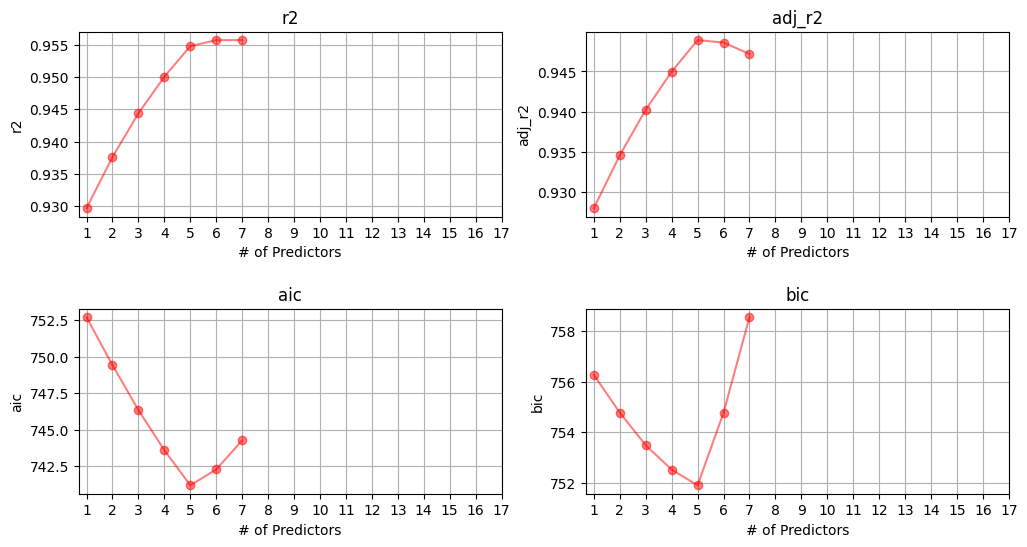%0A)

In \[429\]:

    fwd_models

Out\[429\]:

|     | model                                              | r2       | adj_r2   | aic        | bic        |
|-----|----------------------------------------------------|----------|----------|------------|------------|
| 1   | \<statsmodels.regression.linear_model.Regressio... | 0.92964  | 0.927965 | 752.705448 | 756.273827 |
| 2   | \<statsmodels.regression.linear_model.Regressio... | 0.937592 | 0.934547 | 749.428697 | 754.781266 |
| 3   | \<statsmodels.regression.linear_model.Regressio... | 0.944392 | 0.940222 | 746.352282 | 753.48904  |
| 4   | \<statsmodels.regression.linear_model.Regressio... | 0.95008  | 0.94496  | 743.604278 | 752.525226 |
| 5   | \<statsmodels.regression.linear_model.Regressio... | 0.954838 | 0.948896 | 741.197253 | 751.90239  |
| 6   | \<statsmodels.regression.linear_model.Regressio... | 0.955768 | 0.948596 | 742.281374 | 754.770702 |
| 7   | \<statsmodels.regression.linear_model.Regressio... | 0.955773 | 0.947173 | 744.277012 | 758.550529 |





In \[430\]:

    #Liner model with 6 Variables (based on adjusted r2 and aic)
    selected_features = fwd_models.loc[5, 'model'].model.exog_names
    selected_features
    #model w/o trend

Out\[430\]:

    ['const', 'lag_4', 'Q2', 'lag_1', 'lag_3', 'Q4']

In \[431\]:

    #Define feature matrix for test
    import statsmodels.api as sm
    X_test = test.iloc[:, 4:]
    X_test = sm.add_constant(X_test)
    X_test

Out\[431\]:

|     | const | trend | Q2  | Q3  | Q4  | lag_1   | lag_3   | lag_4   |
|-----|-------|-------|-----|-----|-----|---------|---------|---------|
| 44  | 1.0   | 49    | 0   | 0   | 0   | 16704.0 | 29449.0 | 19380.0 |
| 45  | 1.0   | 50    | 1   | 0   | 0   | 19817.0 | 22967.0 | 29449.0 |
| 46  | 1.0   | 51    | 0   | 1   | 0   | 32157.0 | 16704.0 | 22967.0 |
| 47  | 1.0   | 52    | 0   | 0   | 1   | 23972.0 | 19817.0 | 16704.0 |
| 48  | 1.0   | 53    | 0   | 0   | 0   | 17105.0 | 32157.0 | 19817.0 |
| 49  | 1.0   | 54    | 1   | 0   | 0   | 21045.0 | 23972.0 | 32157.0 |





In \[432\]:

    #Predict on test using expanding window - model 3
    history_x = X_train.copy()
    history_y = y_train.copy()
    pred_fwd_ew = []
    for t in test.index:
        reg_model = sm.OLS(history_y,
                           history_x[selected_features]).fit()
        pred_fwd_ew.append(reg_model.predict(X_test.loc[t, selected_features])[0])
        history_x.loc[t, :] = X_test.loc[t, :]
        history_y[t] = test.loc[t, 'electricity_consumption']

In \[433\]:

    #Check the results
    pred_fwd_ew = pd.Series(pred_fwd_ew, index = test.index)
    pred_fwd_ew

Out\[433\]:

    44    20043.785029
    45    29960.327981
    46    24404.984088
    47    17768.160517
    48    20726.316890
    49    32718.067581
    dtype: float64

In \[434\]:

    #Absolute error
    abs_err_fwd_ew = abs(test['electricity_consumption'] - pred_fwd_ew)
    abs_pct_err_fwd_ew = np.round(abs(test['electricity_consumption'] - pred_fwd_ew) / test['electricity_consumption'] * 100, 1)

    #Absolute error mean, median, sd, IQR, max, min, and MAPE
    from scipy.stats import iqr
    models_comp =  pd.concat([models_comp,
                              pd.DataFrame({'Mean of AbsErrors':    abs_err_fwd_ew.mean(),
                                            'Median of AbsErrors' : abs_err_fwd_ew.median(),
                                            'SD of AbsErrors' :     abs_err_fwd_ew.std(),
                                            'IQR of AbsErrors':     iqr(abs_err_fwd_ew),
                                            'Min of AbsErrors':     abs_err_fwd_ew.min(),
                                            'Max of AbsErrors':     abs_err_fwd_ew.max(),
                                            'MAPE': abs_pct_err_fwd_ew.mean()},
                                           index = ['Forward Selection - Expanding Window'])])
    models_comp

Out\[434\]:

|                                          | Mean of AbsErrors | Median of AbsErrors | SD of AbsErrors | IQR of AbsErrors | Min of AbsErrors | Max of AbsErrors | MAPE     |
|------------------------------------------|-------------------|---------------------|-----------------|------------------|------------------|------------------|----------|
| Exponential Smoothing - Fixed Window     | 959.203240        | 597.113095          | 982.841818      | 1061.343863      | 140.248521       | 2684.273817      | 3.433333 |
| Exponential Smoothing - Expanding Window | 807.152936        | 551.514901          | 657.080467      | 889.072857       | 140.248521       | 1728.109427      | 2.933333 |
| Forward Selection - Expanding Window     | 960.869530        | 548.072303          | 869.374769      | 1263.731090      | 226.785029       | 2196.672019      | 3.450000 |





In \[435\]:

    #Actual vs. Prediction
    plt.figure(figsize = (16, 5))
    plt.plot(test['electricity_consumption'],
             color = 'grey', alpha = 0.8, label = 'Actual')
    plt.plot(pred_fwd_ew,
             color = 'red', alpha = 0.8, label = 'Prediction')
    plt.title('Iran Quarterly Electricity Consumption: \n Actual vs. Predition')
    plt.xlabel('Year')
    plt.ylabel('Units')

    plt.legend()
    plt.grid()
    plt.show()

![](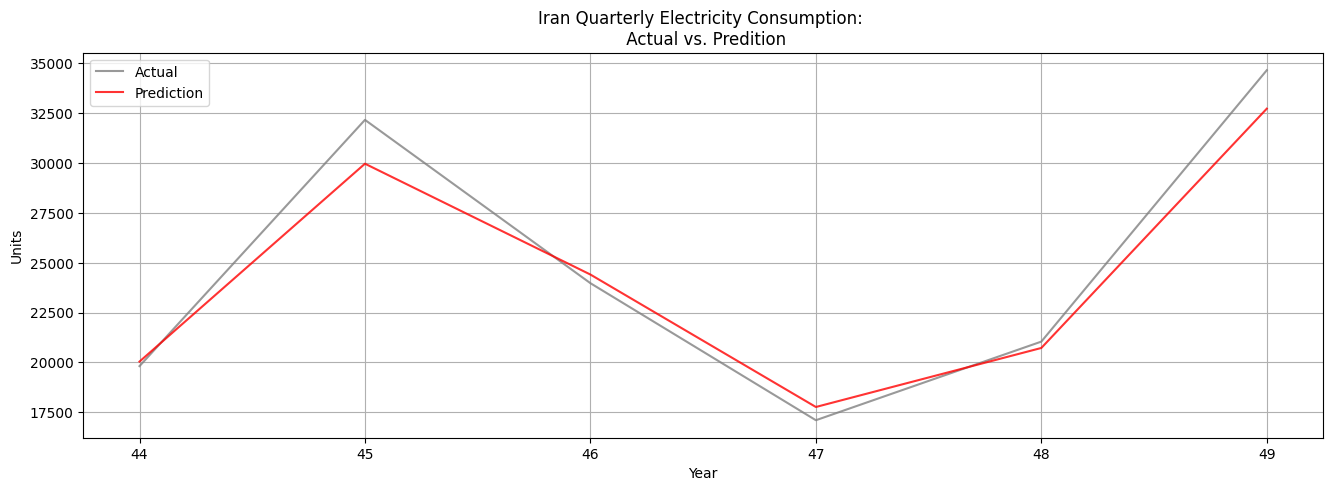%0A)

In \[436\]:

    #Predict on test using expanding window - model 4
    pred_fwd_ew = []
    for t in test.index:
        reg_model = sm.OLS(y_train,
                           X_train[selected_features]).fit()
        pred_fwd_ew.append(reg_model.predict(X_test.loc[t, selected_features])[0])

In \[437\]:

    #Check the results
    pred_fwd_ew = pd.Series(pred_fwd_ew, index = test.index)
    pred_fwd_ew

Out\[437\]:

    44    20043.785029
    45    29973.823988
    46    24299.493945
    47    17806.482963
    48    20724.116339
    49    32225.783351
    dtype: float64

In \[442\]:

    #Absolute error
    abs_err_fwd_ew = abs(test['electricity_consumption'] - pred_fwd_ew)
    abs_pct_err_fwd_ew = np.round(abs(test['electricity_consumption'] - pred_fwd_ew) / test['electricity_consumption'] * 100, 1)

    #Absolute error mean, median, sd, IQR, max, min, and MAPE
    from scipy.stats import iqr
    models_comp =  pd.concat([models_comp,
                              pd.DataFrame({'Mean of AbsErrors':    abs_err_fwd_ew.mean(),
                                            'Median of AbsErrors' : abs_err_fwd_ew.median(),
                                            'SD of AbsErrors' :     abs_err_fwd_ew.std(),
                                            'IQR of AbsErrors':     iqr(abs_err_fwd_ew),
                                            'Min of AbsErrors':     abs_err_fwd_ew.min(),
                                            'Max of AbsErrors':     abs_err_fwd_ew.max(),
                                            'MAPE': abs_pct_err_fwd_ew.mean()},
                                           index = ['Forward Selection - fixed Window'])])
    models_comp

Out\[442\]:

|                                          | Mean of AbsErrors | Median of AbsErrors | SD of AbsErrors | IQR of AbsErrors | Min of AbsErrors | Max of AbsErrors | MAPE     |
|------------------------------------------|-------------------|---------------------|-----------------|------------------|------------------|------------------|----------|
| Exponential Smoothing - Fixed Window     | 959.203240        | 597.113095          | 982.841818      | 1061.343863      | 140.248521       | 2684.273817      | 3.433333 |
| Exponential Smoothing - Expanding Window | 807.152936        | 551.514901          | 657.080467      | 889.072857       | 140.248521       | 1728.109427      | 2.933333 |
| Forward Selection - Expanding Window     | 960.869530        | 548.072303          | 869.374769      | 1263.731090      | 226.785029       | 2196.672019      | 3.450000 |
| Forward Selection - fixed Window         | 1029.839710       | 514.488454          | 1000.917193     | 1490.216518      | 226.785029       | 2419.216649      | 3.650000 |
| Forward Selection - fixed Window         | 1029.839710       | 514.488454          | 1000.917193     | 1490.216518      | 226.785029       | 2419.216649      | 3.650000 |





In \[441\]:

    #Actual vs. Prediction
    plt.figure(figsize = (16, 5))
    plt.plot(test['electricity_consumption'],
             color = 'grey', alpha = 0.8, label = 'Actual')
    plt.plot(pred_fwd_ew,
             color = 'red', alpha = 0.8, label = 'Prediction')
    plt.title('US Monthly Total Vehicle Sales (2022): \n Actual vs. Predition')
    plt.xlabel('Year')
    plt.ylabel('Thousands of Units')

    plt.legend()
    plt.grid()
    plt.show()

![](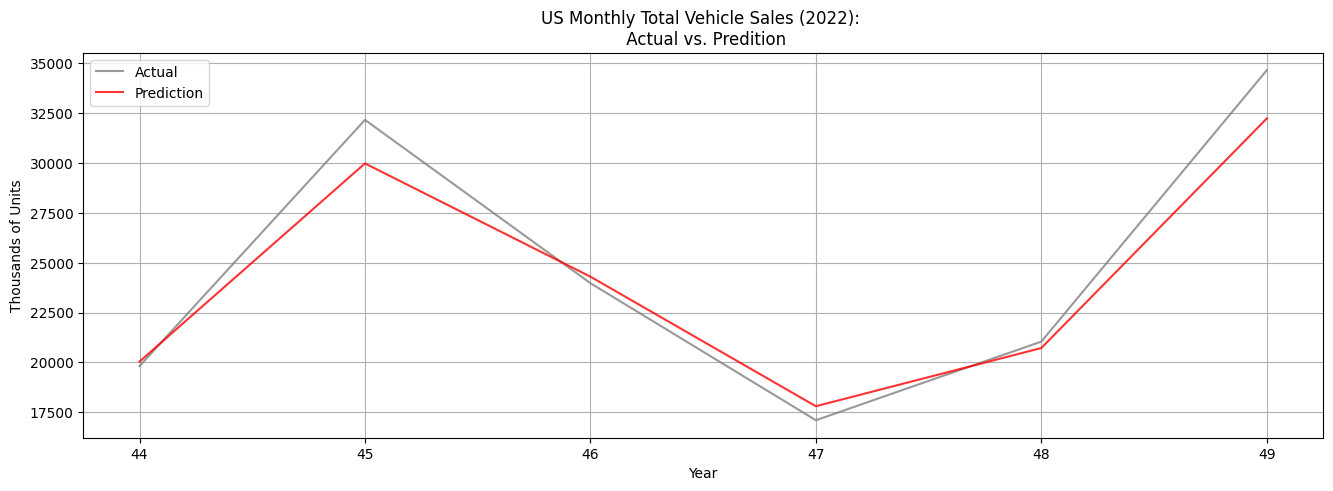%0A)

‌By comparing the output of our four models, we can conclude that the
minimum error was for model 2 (Exponential Smoothing - Expanding Window)
and we should use this model. Also I should mention that I used
multiplicative decomposition due the discussion that we had in class for
increasing seasonality during increasing trend.